# Data Mining CMP-7023B

## Lab 4: Supervised Learning - Classification Part 1 - Examples

#### Objective:
In this lab, we will explore classification algorithms and how they can be applied to datasets to predict target labels. We will also cover essential steps such as splitting the data into training and test sets, performing preprocessing, and evaluating model performance. The aim is to understand the necessary steps for effective classification and to look beyond accuracy when assessing the performance of the models.

The process of data mining involves several key steps, including loading the data, dividing it into training and test datasets. The training set is used to train the model, while the test set is used to evaluate its performance.


#### Steps:
    
    1: Load the dataset - Visualise the data and assign independent features (those used for prediction) to X and the dependent features (labels) to y. Clean and prepare the dataset.
    2: Split the dataset - Divide the data into training and test sets.
    3: Preprocess the data - Perform any necessary transformations, normalisation, or feature construction.
    4: Create the model - Select and configure the classification model.
    5: Fit the model - Train the model on the training dataset.
    6: Predict with the model - Use the trained model to make predictions on the test dataset.
    7: Evaluate the model - Assess the model's performance using relevant metrics.


In [4]:
# Importing necessary modules from scikit-learn and other libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC  # Support Vector Classifier for classification tasks
from sklearn.model_selection import KFold  # For cross-validation

import seaborn as sns  # For data visualization, particularly heatmaps and other plots
import matplotlib.pyplot as plt  # For general plotting and visualizing data
import numpy as np  # For numerical operations and array manipulations
import pandas as pd

#### Set larger plot size

In [6]:
# larger plot

plt.rcParams['figure.figsize'] = [10, 10]

## 1: Loading the data, assign independent features & classes

In this example we are using `Iris Flower Dataset`.
As usual we load the data first:

### i- we can use the built in UCI Iris Flower dataset

In [9]:
# here I am using the built in datasets in sklearn.
# from sklearn import datasets

from sklearn.datasets import load_iris

#load the iris datasets
iris = load_iris(as_frame=True)
X = iris.data   #setup the tabular data - independant features
y = iris.target #setup the labels

print(X) 
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

### ii- we can read the downloaded Iris Flower dataset

In [11]:
#designate the path where you saved your Iris data
iris = pd.read_csv("Iris.csv")

X = iris[["sepal_length", "petal_length", "petal_width"]] # independant features
y = iris["species"] # setup the labels - our target variable

print(X) 
print(y) 

     sepal_length  petal_length  petal_width
0             5.1           1.4          0.2
1             4.9           1.4          0.2
2             4.7           1.3          0.2
3             4.6           1.5          0.2
4             5.0           1.4          0.2
..            ...           ...          ...
145           6.7           5.2          2.3
146           6.3           5.0          1.9
147           6.5           5.2          2.0
148           6.2           5.4          2.3
149           5.9           5.1          1.8

[150 rows x 3 columns]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


#### label Encoder
When working with classification problems, it's important that the target variable (or label) is in a numerical format since most machine learning algorithms expect numeric input. If the target variable is in string format (for example, 'Setosa', 'Versicolor', 'Virginica' in the Iris dataset), we can use LabelEncoder from sklearn to convert these categorical string labels into numeric values.

For example, with the Iris dataset:

'Setosa' would be encoded as 0
'Versicolor' as 1
'Virginica' as 2

Here’s how to apply `LabelEncoder`:

In [13]:
from sklearn.preprocessing import LabelEncoder

#encode the labels from strings to values.
le = LabelEncoder()

y = le.fit_transform(y)

# Show the classes that have been encoded
print("Classes in the target variable:", le.classes_)
print("Encoded target labels:", y)

Classes in the target variable: ['setosa' 'versicolor' 'virginica']
Encoded target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 2: Train and Test Split

In any classification problem, we need two key components: a set of data (the features) and the corresponding labels. For the Iris dataset, the features are the measurements of the flowers, and the label is the species of each flower.

To train our model and evaluate its performance, we must split our dataset into two parts: one for training the model and one for testing it. This is important because we want the model to learn from a set of data for which we know the correct labels, and then assess how well it performs on unseen test data, where the labels are already known but the model hasn’t seen it yet.

In this example, we’ll use the `train_test_split` function from `sklearn` to divide the dataset. By setting `test_size=0.2`, we ensure that 20% of the data will be used for testing, while the remaining 80% will be used for training the model.

It's also worth considering how different train/test split ratios might influence the performance of your classifier. For example, if you use a very small test set, the model might overfit to the training data. Additionally, is accuracy the best measure of performance in every case?

Here’s how to create the train/test split for our model:

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## 3: Pre-Processing
Before feeding our dataset into the classifier, it’s essential to ensure the data is appropriately pre-processed. As you’ve already worked through preprocessing steps in earlier labs, we'll focus on the necessary actions for this specific task.

In this case, we will perform <b> L2 normalisation </b> on both the training and test sets. It’s important to normalise the data <b> together </b>, using the mean and standard deviation calculated from the training set, which are then applied to both the training and test sets. This ensures that the test data remains unseen during training and avoids any potential data leakage.



In [17]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

Since the Iris dataset is clean and well-structured with no missing values, additional preprocessing steps like handling missing data or feature engineering are unnecessary here. However, in real-world datasets, you should consider such steps, as data might not always be as straightforward.

## 4: Classification

In this section, we will select a classifier to use. There are many classification algorithms available, but we will explore two commonly used ones:

   <b> i.  k-nearest neighbors (k-NN) </b>
   
   <b> ii.  Support Vector Classifier (SVC)</b>

<b> For the following steps (5, 6, and 7), we will apply them to each classifier separately. </b>


In sklearn, most classifiers are implemented as objects. We create an instance of the classifier, specifying parameters through the constructor, and then train the model using the `.fit()` function. Once trained, we can make predictions on unseen data using `.predict()` or obtain probability estimates with `.predict_proba()`.

### i: k-nearest neighbors (k-NN) classifier 
The k-Nearest Neighbours (k-NN) algorithm is a simple yet effective classification method. It assumes that similar data points (instances) tend to be near one another. The classification of a new sample is determined by the majority class of its ` k ` nearest neighbours in the training set.

We will use `k=3`, meaning each prediction is based on the three closest training samples.

- Why choose an odd-numbered `k`?
Choosing an odd number for `k` helps avoid ties when determining the majority class, particularly in binary classification problems (where there are only two possible classes). For example, with `k=3`, if two neighbours belong to one class and one belongs to another, the majority class is clear. With an even k (e.g., `k=4`), there could be a tie (2 vs. 2), making the decision less straightforward.

By default, the Euclidean distance is used to measure the distance between data points. However, you can change the distance metric to other options like <b>Manhattan</b> distance or <b>Minkowski</b> distance. Each metric can be better suited for different types of data and problems. 

In [22]:
from sklearn.neighbors import KNeighborsClassifier

clf_nn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

##### Choosing `k`: 
The choice of `k` affects the bias-variance trade-off.
    A small `k` (e.g., `k=1`) may lead to <b>overfitting</b>, capturing noise in the training data.
    A large `k` (e.g., `k=15`) results in a smoother decision boundary, reducing variance but potentially increasing bias.
    `k` is often selected through <b>cross-validation</b> to find an optimal balance.

## 5: Fitting the model

Now, we fit the **k-Nearest Neighbours (k-NN) classifier** using the training data.  

The `.fit(X_train, y_train)` method trains the model by storing the training samples, which will later be used to classify new data points based on their nearest neighbours.  


In [25]:
clf_nn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

After fitting the <b>k_NN classifier</b>, we can use it to predict the labels for the test dataset:

## 6: Prediction

Now that we have trained the classifier, we can use it to make predictions.

We call the `.predict()` function as discussed earlier, passing in the test data (X_test) without labels. The classifier will output a set of <i>predicted</i> labels, `y_hat`, based on the model we trained.

In [28]:
y_hat = clf_nn.predict(X_test)
y_hat

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2,
       2, 0, 1, 0, 1, 2, 1, 2])

This will give us the predicted class labels for the test data.

Retrieving Class Probabilities with `.predict_proba()`

In addition to the class labels, we can retrieve the class probabilities for each prediction using the `.predict_proba()` function. This function returns a probability distribution over all possible classes for each test sample.

In [31]:
y_hat_proba = clf_nn.predict_proba(X_test)
y_hat_proba

array([[0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 1.        ],
       [0.

For each test sample, the output is an array of probabilities, where each element represents the probability that a given sample belongs to each class. 



##### Why use `.predict_proba()`?
Using `.predict_proba()` is especially useful when you want to understand how confident the model is about its predictions. In some applications, you may want to adjust the threshold for classification. For example, instead of classifying an instance as positive when the model predicts the highest probability, you might decide to classify it as positive only if the model's probability of the positive class is above 0.7. This allows for a more controlled approach to making predictions.

Additionally, `.predict_proba()` provides flexibility in scenarios where you need to evaluate uncertainty or make decisions based on probabilities, rather than just binary outcomes.

## 7: Evaluate the model
Time to evaluate the model!

Accuracy is the simplest measure of performance we can consider for a classification model. It describes how many predictions our classifier got right. The lowest accuracy value is 0 and the highest is 1. We usually multiply that value by 100 to obtain a percentage.

$$Accuracy= \frac{ \text{number of correct predictions}} { \text{total number of predictions}}$$


Here we calculate the percentage of correctly predicted labels and in the next week's lab will consider more complex performance measures.

We start using the `accuracy` method in _sklearn_ but we also look at how we may calculate the same manually so we can understand what accuracy is. 

In [36]:
#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(y_test, y_hat)
print('Sklearn calculated accuracy:', accuracy)

#We coould implement our own accuracy.
#find the indices where the predicted and the actual match
counts, = np.where(y_hat==y_test)

print('Number of data points in test data:', len(y_test))
print('Number of data points where prediction is correct:', len(counts))

manual_accuracy = len(counts) / len(y_test)

print('Manual accuracy:',manual_accuracy)
print(counts)
print('Prediction', y_hat)
print('Actual    ',y_test)

Sklearn calculated accuracy: 0.8333333333333334
Number of data points in test data: 30
Number of data points where prediction is correct: 25
Manual accuracy: 0.8333333333333334
[ 0  2  3  4  5  6  7  8 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 28
 29]
Prediction [1 1 0 1 0 1 1 1 0 2 2 2 1 0 0 2 1 0 0 0 1 2 2 0 1 0 1 2 1 2]
Actual     [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


Now the next important thing in understanding classification is visualising the erros through use of a _confusion matrix_.  We import this from _sklearn_.  The confusion matrix shows us the predicted against the actual so we can see errors for each class and correct predictions.  Take some time to understand the confusion matrix. The diagonal shows the correct predictions where actual and predicted coincide, whereas off-diagonal were the errors in prediction. Below we can see that the model miss classified in some instances, it predicts some class 2 instances (Iris Versicolor) as class 3 (Iris Virginica) and some class 3 instances (Iris Virginica) as class 2 (Iris Versicolor).

['setosa' 'versicolor' 'virginica']

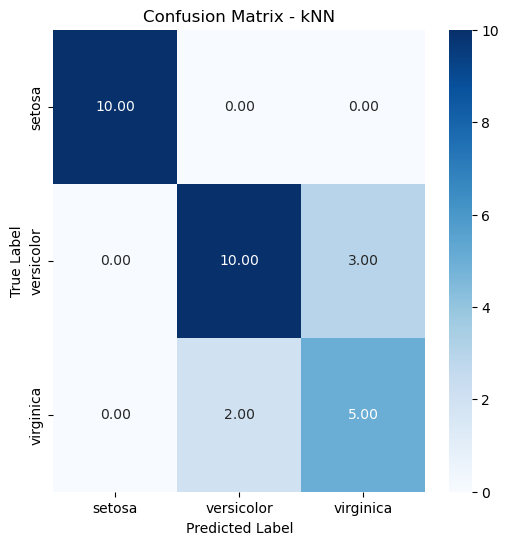

In [38]:
# Confusion matrix
cm = confusion_matrix(y_test, y_hat)

class_names = ['setosa', 'versicolor', 'virginica']

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - kNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### K-Fold Cross Validation for parameter tuning

Sometimes we have multiple options for the parameters of our models. We may wish to tune these parameters to improve the model's performance. However, if we select parameters based on the test data, this is considered <b>"cheating"</b>, as we have already looked at the answers and adjusted our model to maximise a specific score.

In practice, when picking and tuning our parameters, we want to validate on some unseen data (but not use the test data). We can do this by using <b>cross-validation</b>. Cross-validation splits the data into multiple <i>folds</i> and trains and tests the model on different subsets of the data. This helps to reduce the risk of overfitting to a particular split and provides a more generalised performance measure.

By applying cross-validation, we can evaluate different configurations of the model without risk of using the test data. This allows us to select the best model configuration that generalises well to new, unseen data.

Why use Cross-Validation?
Cross-validation helps us tune hyperparameters, such as the number of neighbours (k) in k-NN, by assessing how different values of k perform on unseen data. By experimenting with various values of k, we can avoid overfitting (when k is too small) or underfitting (when k is too large). Cross-validation allows us to test different values for k while ensuring the test data remains untouched for a final evaluation.

In this example, we will experiment with different values of k for the <b>KNeighborsClassifier</b> algorithm. We will try values from 3 to 9 to find the one that performs the best.

In [40]:
# Define the range of k values to test
criterion_parameter = [3, 5, 7, 9]

# Import KFold cross-validation from sklearn
from sklearn.model_selection import KFold

# Set up KFold with as many splits as there are parameter options
kf = KFold(n_splits=len(criterion_parameter))

# Create an empty list to store accuracies
accuracies = []

# Iterate through the cross-validation splits
for index, (train_index, test_index) in enumerate(kf.split(X_train)):
    # Create classifier with current parameter (k)
    clf_knn_cv = KNeighborsClassifier(n_neighbors=criterion_parameter[index])
    
    # Split the data into training and testing sets for this fold
    X_train_cv, y_train_cv = X_train[train_index], y_train[train_index]
    X_test_cv, y_test_cv = X_train[test_index], y_train[test_index]
    
    # Fit the model on the training data
    clf_knn_cv.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation data
    y_hat_cv = clf_knn_cv.predict(X_test_cv)

    # Store the accuracy for this fold
    accuracies.append(accuracy_score(y_test_cv, y_hat_cv))
    print('Criterion:', criterion_parameter[index], ' Accuracy:', accuracies[index])

# Pick the best parameter based on the highest accuracy
import numpy as np
best_parameter = criterion_parameter[np.argmax(accuracies)]
print('Best parameter is:', best_parameter)

# Train the classifier with the best parameter using the whole training set
tuned_clf = KNeighborsClassifier(n_neighbors=best_parameter)
tuned_clf.fit(X_train, y_train)

# Evaluate the accuracy on the unseen test data
score = accuracy_score(y_test, tuned_clf.predict(X_test))
print('Accuracy on unseen test data:', score)

Criterion: 3  Accuracy: 0.9666666666666667
Criterion: 5  Accuracy: 0.9333333333333333
Criterion: 7  Accuracy: 1.0
Criterion: 9  Accuracy: 1.0
Best parameter is: 7
Accuracy on unseen test data: 0.9


####  K-Fold Things to Remember

When training and fitting our parameters we must remember to never use the test data. We may apply a similar approach to choosing pre-processing strategies via cross-validation.  

### ii: Support Vector Classifier (SVC)
A <b>Support Vector Classifier</b> (SVC) is a powerful classification algorithm that works by finding the optimal decision boundary (or hyperplane) that separates different classes. The goal of the SVC is to maximise the margin between the classes while minimising classification errors.

In this case, we use a <b>polynomial kernel</b> with degree=3. This means the decision boundary is defined by a cubic function of the form:

 $$f(x) = ax^3 + bx^2 + cx + d$$

Polynomial kernels allow the model to capture more complex patterns in the data compared to a linear classifier. This flexibility makes the model capable of handling non-linear relationships between features. However, increasing the degree of the polynomial can lead to <b>overfitting</b>, where the model becomes too complex and captures noise in the data. Therefore, it's important to carefully choose the degree of the polynomial kernel to avoid overfitting.

In [44]:
from sklearn.svm import SVC

clf_svm = SVC(kernel='poly', degree=3)

In this example, we’ve chosen a polynomial kernel with degree=3, but you can experiment with different degrees to see how the model's performance changes.

Polynomial kernel allows the classifier to capture more complex relationships between features compared to a linear model.

A higher degree kernel may lead to overfitting by creating overly complex decision boundaries.

Selecting an appropriate degree is crucial to achieving a good balance between underfitting and overfitting.

## 5: Fit the data to the model

Now, we fit the <b>SVC</b> to the training data. As discussed earlier, we use the `.fit()` function, passing in the training data (`X_train`) and the corresponding labels (`y_train`). This step trains the classifier, enabling it to learn the relationship between the features and the target labels.

In [47]:
clf_svm.fit(X_train,y_train)

SVC(kernel='poly')

 After fitting the model, the classifier is ready to predict the classes of the test data:

## 6: Prediction

Now that we have trained the <b>Support Vector Classifier (SVC)</b>, we can use it to make predictions.

We call the .predict() function as discussed earlier, passing in the test data (X_test) with <b>no</b> labels. The classifier will output a set of predicted labels, y_hat_svm, based on the model we trained.

In [50]:
y_hat_svm = clf_svm.predict(X_test)
y_hat_svm

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

## 7: Evaluate the model

Now that we've trained the model, it's time to evaluate its performance.

We can calculate the accuracy of the model using the built-in `accuracy_score` method from sklearn. This function compares the predicted labels (`y_hat_svm`) with the true labels (`y_test`), giving us the percentage of correct predictions.

Calculated accuracy: 0.9666666666666667


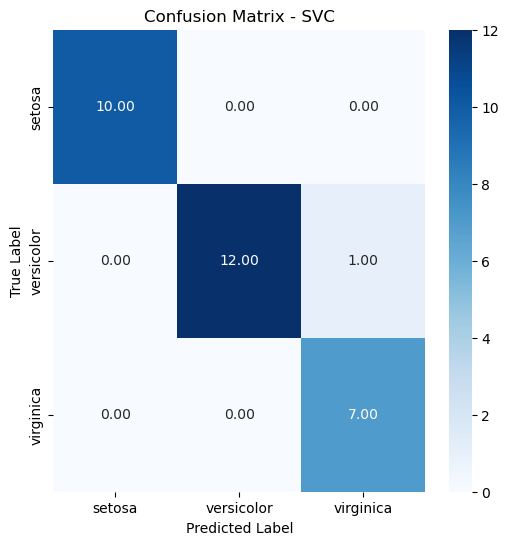

In [52]:
#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(y_test, y_hat_svm)
print('Calculated accuracy:', accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_hat_svm)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - SVC")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Summary of modelling using the SVC algorithm

Now, let's repeat the steps we discussed earlier, but this time we apply them all together. We will generate the accuracy, classification report, and confusion matrix to evaluate the performance of our model.

Calculated accuracy: 0.9666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



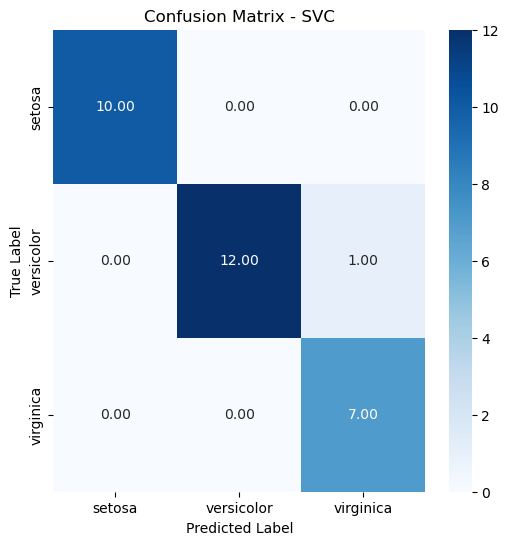

In [54]:
# Fit the model
clf = clf_svm
clf.fit(X_train, y_train)

# Predict using the trained model
y_hat_svm = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_hat_svm)
print('Calculated accuracy:', accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_hat_svm))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_hat_svm)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Classification Report: The classification_report provides a detailed breakdown of precision, recall, and F1-score for each class. This helps us understand how well the model is performing for each class individually.

### K-Fold Cross Validation for SVC parameter tuning

In SVC, we can tune certain parameters of the model to improve performance. One of the most important parameters is the <b>'C'</b> parameter.

We may wish to tune the <b>'C'</b> parameter, which controls the trade-off between achieving a low error on the training data and maintaining a simpler decision boundary. A smaller <b>'C'</b> value allows for a smoother decision boundary, while a larger <b>'C'</b> tries to classify all training points correctly (this might lead to overfitting).

We are going to tune the <b>'C'</b> parameter of the SVC model using <b>K-Fold cross-validation</b>, and then evaluate the best model using different performance metrics.

Parameter C = 0.1, Accuracy = 0.63
Parameter C = 1, Accuracy = 0.93
Parameter C = 10, Accuracy = 1.00
Parameter C = 100, Accuracy = 1.00

Best 'C' value based on cross-validation: 10

Accuracy on unseen test data: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



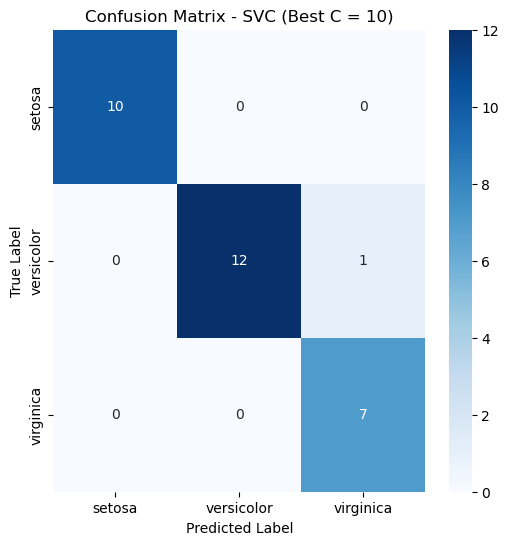

In [57]:
# We will tune the 'C' parameter (penalty parameter) of the SVC.
# The 'C' parameter controls the trade-off between achieving a low error on the training data
# and maintaining a simpler decision boundary. A smaller 'C' allows for a smoother boundary,
# while a larger 'C' tries to fit all the training data points correctly (which may lead to overfitting).

# List of 'C' values to test for tuning
C_values = [0.1, 1, 10, 100]

# Create a KFold cross-validation object with the number of splits equal to the number of 'C' values
kf = KFold(n_splits=len(C_values))

# List to store accuracy scores for each value of 'C'
accuracies = []

# Perform K-fold cross-validation for each 'C' value
for index, (train_index, test_index) in enumerate(kf.split(X_train)):
    # Initialise the SVC classifier with the current 'C' parameter
    clf_svc_cv = SVC(C=C_values[index])
    
    # Split the data into training and validation sets for the current fold
    X_train_cv, y_train_cv = X_train[train_index], y_train[train_index]
    X_test_cv, y_test_cv = X_train[test_index], y_train[test_index]
    
    # Fit the classifier to the training fold
    clf_svc_cv.fit(X_train_cv, y_train_cv)

    # Predict the labels for the validation fold
    y_hat_cv = clf_svc_cv.predict(X_test_cv)

    # Calculate and store the accuracy for the current fold
    accuracies.append(accuracy_score(y_test_cv, y_hat_cv))
    print(f"Parameter C = {C_values[index]}, Accuracy = {accuracies[index]:.2f}")

# Identify the best 'C' value based on the highest accuracy
best_C = C_values[np.argmax(accuracies)]
print(f"\nBest 'C' value based on cross-validation: {best_C}")

# Train the final model using the best 'C' value on the whole training data
tuned_clf = SVC(C=best_C)
tuned_clf.fit(X_train, y_train)

# Evaluate the tuned model on the unseen test data
y_hat_test = tuned_clf.predict(X_test)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_hat_test)
print(f"\nAccuracy on unseen test data: {test_accuracy:.2f}")

# Display additional evaluation metrics (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_hat_test))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - SVC (Best C = {best_C})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Comparing Classifiers

Often helpful to compare the performance of different classifiers. By doing this, we can rank how each one performs on the same dataset. This comparison helps us choose the best algorithm for the problem we're trying to solve. It's important to remember that no single algorithm is the best for all types of problems, as explained by the "No Free Lunch" theorem.

We will now compare two classifiers, the k-NN and SVC, using several performance measures. We'll evaluate their accuracy, and also use the confusion matrix and classification report for a deeper understanding of their performance.

Best classifier: SVC(kernel='poly') with an accuracy of: 0.97
Accuracy scores for each classifier: [0.83333333 0.96666667]


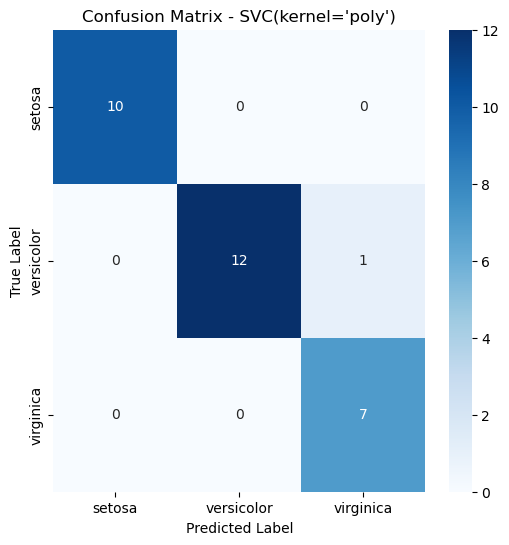

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [59]:
# Bundle up the classifiers
clfs = [clf_nn, clf_svm]

# Fit the classifiers with the data
for clf in clfs:
    clf.fit(X_train, y_train)

# Get the predictions for each classifier
clf_preds = [clf.predict(X_test) for clf in clfs]

# Get the accuracy score for each classifier
accs = [accuracy_score(y_test, clf_p) for clf_p in clf_preds]

# Get the index of the best accuracy
index = np.argmax(accs)

print(f"Best classifier: {clfs[index]} with an accuracy of: {accs[index]:.2f}")

# Display accuracy scores of all classifiers
print("Accuracy scores for each classifier:", np.sort(accs))

# Evaluate the best classifier in more detail
best_clf = clfs[index]

# Confusion Matrix
cm = confusion_matrix(y_test, clf_preds[index])
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - {best_clf}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
report = classification_report(y_test, clf_preds[index])
print("Classification Report:\n", report)


The best classifier for the Iris dataset is SVC with a polynomial kernel, achieving an accuracy of 97%.

The accuracy scores for each classifier are k-NN 0.83 and SVC 0.97, with the SVC classifier performing better.
Classification Report:

    - Class 0 (Setosa): The model performs perfectly, with 100% precision, recall, and F1-score.
    - Class 1 (Versicolor): Very good performance, with 100% precision but 92% recall, meaning a few instances were missed. The F1-score is 96%.
    - Class 2 (Virginica): Good recall (100%), but 12% of predicted class 2 instances were incorrect (88% precision). The F1-score is 93%.
The overall accuracy of the model is 97%, with high macro and weighted averages (96-97%) for precision, recall, and F1-score, indicating strong, consistent performance across all classes.

##  Learning outcomes
- We have learned how to create training and test partitions.
- We have explored two different classification models: k-NN and SVM.
- We have evaluated these models using accuracy as the scoring function.
- We have examined confusion matrices.
- We have experimented with model parameters.